# Workforce scheduling problem

## Motivation
People are the most important asset in the services industry and the largest cost.

Workforce allocation and personnel scheduling deal with the arrangement of work schedules  and the assignment of personnel shifts in order to cover the demand for resources that vary over time.

These problems are very important in services industries such as:
* Telephone operators
* Hospital nurses
* Policemen
* Transportation personnel (plane crews, bus drivers)
* Hospitality industry
* Restaurant industry
* etc.

## Problem description

Consider a service business, like a restaurant, that develops its workforce plans for the next two weeks -considering a (7-day) week. The service requires only one set of skills. There are a number of employed workers with the same set of skills and with identical productivity that are available to work on some of the days during the two-weeks planning horizon. There is only one shift per workday. Each shift may have different resource (workers) requirements on each workday. The service business may hire extra (temp) workers from an agency to satisfy shift requirements. The service business wants to minimize the number of extra workers that needs to hire, and as a secondary objective (fairness) it wants to balance the workload of employed workers.

## Model formulation
Mathematical programming is a declarative approach where the modeler formulates a mathematical optimization problem that captures the key features of a complex decision problem. The Gurobi optimizer solves the mathematical optimization problem using state of the art mathematics and computer science.

A mathematical optimization model has five components.
* Sets
* Parameters
* Decision variables
* Constraints
* Objective function(s)

### Sets and indices
For the workforce problem, we have two sets: the set of $workers$ which corresponds to the employed workers in the service business, and the set of $shifts$ which corresponds to each of the work days in the planning horizon. For example, the set of $workers = \{1:Amy, \; 2:Bob  \}$ maps the index 1 with the employed worker Amy, and the index 2 with the employed worker Bob. The set of $shifts = \{1:Mon1, \; 2:Tue2  \}$ maps the index 1 with the work day Mon1, and the index 2 with the work day Tue2.

In general, for the workforce problem, we have:

Let $s \in shifts$ be the index and set of shifts.

Let $w \in workers$ be the index and set of workers.

### Parameters
In general, the parameters maps the inidces of the sets to particular values that represent the input data of the mathematical optimization problem. For example, the shift requirement on the Mon1 work day is 3 workers. This can be represented by an array called shiftRequirements, where $shiftRequirements(Mon1) = 3$.

The input data of the workforce problem is defined by the following paramters.

Let the parameter $shiftRequirements(s)$ be the number of workers required at shift $s$, for all $s \in shifts$.

Let the parameter $pay(w)$ be the salary per day of a worker $w$, for all $w \in workers$. 

The parameter $availability(w,s)$ establishes that the employed worker  $w$ is available to work on shift $s$.

Let $relTol$ be the relative tolerance paramater that allows to deviate from the optimal objective function value of the primary objective, when solving the model for the secondary objective. (See optimization process).

### Computed parameters
These parameters are derived from the input parameters and/or from the optimization process.

Let $Opt(totSlack)$ be the minimum value of extra workers required to fill demand. 

### Decision variables
The decision variables represents the solution of the mathematical optimization model. That is, the optimal values of the decision variables are recommendations about the courses of action that optimize the business objective(s). The decision variables maps the inidces of the sets to particular values that represent the best course of action. For example, if the  mathematical optimization model recommends that Amy works on Mon1 shift, this can be represented by a two dimensional array x, where the first dimension is the set of workers and the second dimension is the set of shifts. Hence, x(Amy, Mon1) = 1 means that Amy has been assigned to work the Mon1 shift.

The best courses of action of the workforce problem is defined by the following decision variables.

Let $x(w,s) = 1$ if worker $w$ is assigned to shift $s$ and 0 otherwise. 

Let $Slack(s)$ be the number of extra workers required to satisfy the requirements of shift $s$.

### Auxiliary variables
Auxiliary variables are derived from the values of the decision variables.

The variable $totSlack$ counts the total number of extra workers required to satisfy shift workers demand.

The variable $totShifts(w)$ counts the total number of shifts worked by each worker.

The variable $minShift$ determines the minimum number of shifts allocated to workers. 

The variable $maxShift$ determines the maximum number of shifts allocated to workers.

### Optimization process

In this modeling example, we tackle a multi-objective model where the primary objective is to minimize the number of extra workers required to satisfy shift requirements, and the secondary objective is to minimize the maximum difference in the number of shifts worked between any pair of workers. This secondary objective balance the workload allocated to workers.
 
The hierarchical multi-objective optimization approach will first solve the following model where we minimize the number of extra workers allocated.

 
\begin{equation}
Min \; totSlack
\end{equation}

Subject to:

All shifts requirements most be satisfied:
\begin{equation}
\sum_{w \: \in \: workers} x(w,s) \; + \; Slack(s) \; = \; shiftRequirements(s) \; \; \; \forall \; s \in shifts
\end{equation}

Compute the total number of extra workers required:
\begin{equation}
\sum_{s \: \in \: shifts} Slack(s) \; = \; totSlack 
\end{equation}

Compute the total number of shifts for each worker:
\begin{equation}
\sum_{s \: \in \: shifts} x(w,s) \; = \; totShifts(w) \; \; \; \forall \; w \in workers
\end{equation}

Binary and non-negativity constraints:
\begin{equation}
x(w,s) \in \{0, 1 \}  \; \; \; \forall \; w \in workers \; and \;  s \in shifts
\end{equation}
\begin{equation}
Slack(s) \geq 0 \; \; \; \forall \; s \in shifts  \; \; \;totShifts(w) \geq 0 \; \; \; \forall \; w \in workers
\end{equation}
\begin{equation}
totSlack  \geq 0
\end{equation}

The parameter $Opt(totSlack)$ is set to be equal to the minimum number of extra workers required to satisfy demand. That is, $Opt(totSlack) \;=\; totSlack^{*} $, where $totSlack^{*} $ is the optimal value of the variable $totSlack$.

For a given relative tolerance of primary objective $relTol$, we now solve the following model where we minimize the difference between the maximum number of shifts allocated to a worker, and the minimum number of shifts allocated to a worker.


\begin{equation}
Min \; ( maxShift \; - \; minShift )
\end{equation}

Subject to:

All shifts requirements most be satisfied:
\begin{equation}
\sum_{w \: \in \: workers} x(w,s) \; + \; Slack(s) \; = \; shiftRequirements(s) \; \; \; \forall \; s \in shifts
\end{equation}


Ensure that the total number of extra workers (totSlack) minimized by the primary objective is satisfied up to a tolerance percentage.
\begin{equation}
\sum_{s \: \in \: shifts} Slack(s) \; \leq \; (1+relTol)*Opt(totSlack)
\end{equation}


Compute the total  number of shifts for each worker: 
\begin{equation}
\sum_{s \: \in \: shifts} x(w,s) \; = \; totShifts(w) \; \; \; \forall \; w \in shifts 
\end{equation}

Compute the minimum number of shifts allocated to an employed worker:
\begin{equation}
minShift = Min \{totShifts(w): \ w \; in \; workers \}  
\end{equation}


Compute the maximum number of shifts allocated to an employed worker:
\begin{equation}
maxShift = Max \{totShifts(w): \ w \; in \; workers \}
\end{equation}

Binary and non-negativity constraints:
\begin{equation}
x(w,s) \in \{0, 1 \}  \; \; \; \forall \; w \in workers \; and \;  s \in shifts
\end{equation}
\begin{equation}
Slack(s) \geq 0 \; \; \; \forall \; s \in shifts \; \; \;totShifts(w) \geq 0 \; \; \; \forall \; w \in workers 
\end{equation}
\begin{equation}
minShift, maxShift    \geq 0
\end{equation}

This optimization process is done automatically by the Gurobi Python API when using the following method: 

"Model.setObjectiveN()"


## What you will learn
* You will learn how to formulate the workforce scheduling problem as a mixed integer programming (MIP) problem using the Gurobi Python API
* The workforce scheduling problem is formulated as a multi-objective MIP, conequently you will learn how to configure the model objective method "Model.setObjectiveN()" that allows to handle multiple objectives hierarchically.

In [1]:
# This command imports the Gurobi functions and classes.

from gurobipy import *
import pandas as pd

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Number of workers required for each shift.
# The multidict function returns a list which maps each shift (key) to the number of workers required 
# by the shift duirng work day.
shifts, shiftRequirements = multidict({
  "Mon1":  3,
  "Tue2":  2,
  "Wed3":  4,
  "Thu4":  4,
  "Fri5":  5,
  "Sat6":  6,
  "Sun7":  5,
  "Mon8":  2,
  "Tue9":  2,
  "Wed10": 3,
  "Thu11": 4,
  "Fri12": 6,
  "Sat13": 7,
  "Sun14": 5 })

In [3]:
# Amount each worker is paid to work one shift.
workers, pay = multidict({
  "Amy":   10,
  "Bob":   12,
  "Cathy": 10,
  "Dan":   8,
  "Ed":    8,
  "Fred":  9,
  "Gu":    11 })

In [4]:
# Worker availability: defines on which day each employed worker is available.
# The Gurobi tuple list is a sub-class of the Python list class that is designed to efficiently
# support a usage pattern that is quite common when building optimization models. In particular, if a
# tuplelist is populated with a list of tuples, the select function on this class efficiently selects 
# tuples whose values match specified values in specified tuple fields. To give an example, the 
# statement l.select(1, ’*’, 5) would select all member tuples whose first field is equal to ’1’ and 
# whose third field is equal to ’5’. The ’*’ character is used as a wildcard to indicate that any 
# value is acceptable in that field.
availability = tuplelist([
('Amy', 'Tue2'), ('Amy', 'Wed3'), ('Amy', 'Fri5'), ('Amy', 'Sun7'),
('Amy', 'Tue9'), ('Amy', 'Wed10'), ('Amy', 'Thu11'), ('Amy', 'Fri12'),
('Amy', 'Sat13'), ('Amy', 'Sun14'), ('Bob', 'Mon1'), ('Bob', 'Tue2'),
('Bob', 'Fri5'), ('Bob', 'Sat6'), ('Bob', 'Mon8'), ('Bob', 'Thu11'),
('Bob', 'Sat13'), ('Cathy', 'Wed3'), ('Cathy', 'Thu4'), ('Cathy', 'Fri5'),
('Cathy', 'Sun7'), ('Cathy', 'Mon8'), ('Cathy', 'Tue9'), ('Cathy', 'Wed10'),
('Cathy', 'Thu11'), ('Cathy', 'Fri12'), ('Cathy', 'Sat13'),
('Cathy', 'Sun14'), ('Dan', 'Tue2'), ('Dan', 'Wed3'), ('Dan', 'Fri5'),
('Dan', 'Sat6'), ('Dan', 'Mon8'), ('Dan', 'Tue9'), ('Dan', 'Wed10'),
('Dan', 'Thu11'), ('Dan', 'Fri12'), ('Dan', 'Sat13'), ('Dan', 'Sun14'),
('Ed', 'Mon1'), ('Ed', 'Tue2'), ('Ed', 'Wed3'), ('Ed', 'Thu4'),
('Ed', 'Fri5'), ('Ed', 'Sun7'), ('Ed', 'Mon8'), ('Ed', 'Tue9'),
('Ed', 'Thu11'), ('Ed', 'Sat13'), ('Ed', 'Sun14'), ('Fred', 'Mon1'),
('Fred', 'Tue2'), ('Fred', 'Wed3'), ('Fred', 'Sat6'), ('Fred', 'Mon8'),
('Fred', 'Tue9'), ('Fred', 'Fri12'), ('Fred', 'Sat13'), ('Fred', 'Sun14'),
('Gu', 'Mon1'), ('Gu', 'Tue2'), ('Gu', 'Wed3'), ('Gu', 'Fri5'),
('Gu', 'Sat6'), ('Gu', 'Sun7'), ('Gu', 'Mon8'), ('Gu', 'Tue9'),
('Gu', 'Wed10'), ('Gu', 'Thu11'), ('Gu', 'Fri12'), ('Gu', 'Sat13'),
('Gu', 'Sun14')
])

In [5]:
# Create initial model.
# The Model() constructor creates a model object m. The name of the model object m is workforce5
m = Model("workforce5")

In [6]:
# Initialize assignment decision variables.
# x[w][s] == 1 if worker w is assigned to shift s, and 0 otherwise.
# The addVar() method adds decision variables to the model object m, and returns a Gurobi tupledict 
# object (x) that contains the variables recently created. The first argument (availability) provides 
# the keys to access the variables in the returned tupledict. Recall that (availability) is a tuple 
# list that defines if an employed worker is available to work a shift.
# The argument vtype defines the type of decision variables. GRB.BINARY means that the assignmnet
# variables x are binary. The argumment name is the name of the decision variable.
x = m.addVars(availability, vtype=GRB.BINARY, name="x")

In [7]:
# Slack decision variables determine the number of extra workers required to satisfy the requirements 
# of each shift
slacks = m.addVars(shifts, name="Slack")

In [8]:
# Auxiliary variable totSlack to represent the total number of extra workers required to satisfy the 
# requirements of all the shifts.
totSlack = m.addVar(name='totSlack')

In [9]:
# Auxiliary variable totShifts counts the total shifts worked by each employed worker
totShifts = m.addVars(workers, name="TotShifts")

$$\sum_{w \: \in \: workers} x(w,s) \; + \; Slack(s) \; = \; shiftRequirements(s) \; \; \; \forall \; s \in shifts $$

In [10]:
# Constraint: All shifts requirements most be satisfied.
# The addConstrs() method adds multiple constraints to the model object m using a Python generator 
# expression.
# This method returns a Gurobi tupledict that contains the newly created constraints, indexed by 
# the values generated by the generator expression. 
# The first argument of this method is a generator expression, where each iteration produces a 
# constraint. 
# The second argument is the name of the constraints, and the given name will be subscripted by the 
# index of the generator expresion. 
# This method returns a Gurobi tupledict object that contains the constraints recently created,
# indexed by the values specified by the generator.
# The assignment variables (x) are defined over the tupledict (availability), therefore we can use 
# x.sum() to create a linear expression that captures the sum of the variables in the tupledict. 
# The expression x.sum(*,s) means the sum of the assignment variables (x) over the set (workers). 
# We add the variable (slack) in case we don't have enough employed workers to satisfy. 
# These are equality constraints defined by ==. In the left hand side of the constraint we have
# the shift requirements for each shift s in the set of (shifts). 
# The name of these constriants is (shiftRequirements).
m.addConstrs((x.sum('*',s) + slacks[s] == shiftRequirements[s] for s in shifts), name='shiftRequirement')
m.update()

$$ \sum_{s \: \in \: shifts} Slack(s) \; = \; totSlack  $$

In [11]:
# Constraint: set the auxiliary variable (totSlack) equal to the total number of extra workers 
# required to satisfy shift requirements
m.addConstr(totSlack == slacks.sum(), name='totSlack')
m.update()

$$\sum_{s \: \in \: shifts} x(w,s) \; = \; totShifts(w) \; \; \forall \ w \; in \; workers$$

In [12]:
# Constraint: compute the total number of shifts for each worker
m.addConstrs((totShifts[w] == x.sum(w,'*') for w in workers), name='totShifts')
m.update()

The variable $minShift$ determines the minimum numbers of shifts allocated to workers. This variable is calculated as follows:
$minShift = Min \{totShifts(w): \ w \; in \; workers \} $

The variable $maxShift$ determines the maximum numbers of shifts allocated to workers. This variable is calculated as follows:
$maxShift = Max \{totShifts(w): \ w \; in \; workers \} $

In [13]:
# Auxiliary variables. 
# minShift is the minimum number of shifts allocated to workers 
# maxShift is the maximum number of shifts allocated to workers
minShift = m.addVar(name='minShift')
maxShift = m.addVar(name='maxShift')
# Constraint: The addGenConstrMin() method of the model object m adds a new general constraint that 
# determines the minimum value among a set of variables. 
# The first argument is the variable whose value will be equal to the minimum of the other variables, 
# minShift in this case. 
# The second argument is the set variables over which the minimum will be taken, (totShifts) in 
# this case. 
# Recall that the totShifts variable is defined over the set of worker and determines the number of 
# shifts that an employed worker will work. The third argument is the name of this constraint.
m.addGenConstrMin(minShift, totShifts, name='minShift')
# Constraint: Similarly, the addGenConstrMax() method of the model object m adds a new general 
# constraint that determines the maximum value among a set of variables.
m.addGenConstrMax(maxShift, totShifts, name='maxShift')
m.update()

We have a primary and a secondary objective both are to minimize

In [14]:
# Set global sense for ALL objectives.
# This means that all objectives of the model object m are going to be minimized
m.ModelSense = GRB.MINIMIZE

The primary objective is to minimize the total number of extra workers required to satisfy shift requirements. 
$$
Min \; totSlack \; = \; \sum_{s \: \in \: shifts} Slack(s) 
$$

For this objective we allow a degration tolerance of up to certain percentage. If reltol = 0.2, then we allow a degradation
tolerance of 20%. 

In [15]:
# Set up primary objective.
# The setObjectiveN() method of the model object m allows to define multiple objectives.
# The first argument is the linear expression defining the most important objective, called primary 
# objective, in this case it is the minimization of extra workers required to satisfy shift 
# requirements. 
# The second argument is the index of the objective function, we set the index of the primary 
# objective to be equal to 0. 
# The third argument is the priority of the objective.
# The fourth argument is the relative tolerance to degrade this objective when a lower priority
# objective is optimized. The fifth argument is the name of this objective.
# A hierarchical or lexicographic approach assigns a priority to each objective, and optimizes 
# for the objectives in decreasing priority order. 
# For this problem, we have two objectives, and the primary objective has the highest priority 
# which is equal to 2. 
# When the secondary objective is minimized, since the relative tolerance is 0.2, we can only 
# increase the minimum number of extra workers up to 20%. 
# For example if the minimum number extra workers is 10, then when optimizing the secondary objective 
# we can have up to 12 extra workers.
m.setObjectiveN(totSlack, index=0, priority=2, reltol=0.2, name='TotalSlack')

The secondary objective is to balance workload among workers, to do so we minimize the difference between the maximum 
number of shifts allocated to a worker, and the minimum number of shifts allocated to a worker. That is
$$
Min \; maxShift \; - \; minShift 
$$ 

In [16]:
# Set up secondary objective
# The secondary objective is called fairness and its goal is to balance the workload assigned 
# to the employed workers. 
# To balance the workload assigned to the employed workers, we can minimimze the difference 
# between the maximum number of shifts assigned to an employed worker and the minimum number 
# of shifts assigned to an employed worker.
m.setObjectiveN(maxShift - minShift, index=1, priority=1, name='Fairness')

In [17]:
# Save model formulation for inspection
# The write() method of the model object m writes the MIP formulation into the file workforce.lp
# The file workforce.lp contains the MIP formulation that Gurobi has in memory.
# This file is very helpful for debugging purposes.
m.write('workforce.lp')

In [18]:
# Optimize
# This method runs the optimization engine to solve the MIP problem in the model object m
m.optimize()

Optimize a model with 22 rows, 96 columns and 180 nonzeros
Model has 2 general constraints
Variable types: 24 continuous, 72 integer (72 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 7e+00]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve added 10 rows and 22 columns
Presolve time: 0.03s
Presolved: 32 rows and 118 columns
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 (TotalSlack) ...
---------------------------------------------------------------------------

Presolve added 7 rows and 0 columns
Presolve remo

In [19]:
# The Status attribute  provides current optimization status of the model object m
# In workforce model, we check if the model is infeasible or unbounded and report this situation
status = m.Status
if status == GRB.Status.INF_OR_UNBD or status == GRB.Status.INFEASIBLE  or status == GRB.Status.UNBOUNDED:
    print('The model cannot be solved because it is infeasible or unbounded')
    sys.exit(0)
# If the optimization status of the model is not optimal for some other reason, we report that 
# situation.
if status != GRB.Status.OPTIMAL:
    print('Optimization was stopped with status ' + str(status))
    sys.exit(0)

KPIs
                    KPI Value
0  Total slack required   7.0
--------------------------------------------------
Shifts
  Worker  Number of shifts
0     Gu               7.0
1     Ed               7.0
2    Dan               7.0
3   Fred               7.0
4    Amy               8.0
5  Cathy               8.0
6    Bob               7.0


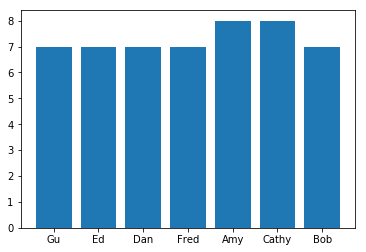

--------------------------------------------------
Assigments
Symbols: '-': not working, '*': working
  worker Wed10 Sat6 Tue9 Fri12 Thu11 Thu4 Tue2 Sun7 Mon1 Sat13 Wed3 Sun14 Fri5 Mon8
0     Gu     *    *    -     *     -    -    -    *    *     -    -     *    *    -
1     Ed     -    -    -     -     -    *    *    *    -     *    *     *    *    -
2    Dan     *    *    -     *     *    -    -    -    -     *    *     -    *    -
3   Fred     -    *    -     *     -    -    -    -    *     *    *     *    -    *
4    Amy     -    -    *     *     *    -    -    *    -     *    *     *    *    -
5  Cathy     *    -    *     *     *    *    -    *    -     *    -     *    -    -
6    Bob     -    *    -     -     *    -    *    -    *     *    -     -    *    *


In [20]:
# Print total slack and the number of shifts worked for each worker
# The KPIs for this optimization number is the number of extra worked required to satisfy 
# demand and the number of shifts that each employed worker is working.
solution = {}
shifts_sol = {}
solution['Total slack required'] = str(totSlack.X)
assignments_all = {}
gant={}

assignments = dict()
for [w, s] in availability:
    if x[w, s].x == 1:
        if w in assignments:
            assignments[w].append(s)
        else:
            assignments[w] = [s]

print('KPIs')
print(pd.DataFrame.from_records(list(solution.items()), columns=['KPI', 'Value']))
print('-'*50)

for w in workers:
    shifts_sol[w]=totShifts[w].X
    assignments_all[w]=assignments.get(w, [])

print('Shifts')
print(pd.DataFrame.from_records(list(shifts_sol.items()), columns=['Worker', 'Number of shifts']))
    
y_pos = np.arange(len(shifts_sol.keys())) 
plt.bar(y_pos,shifts_sol.values() , align='center')
plt.xticks(y_pos, shifts_sol.keys())
plt.show()

print('-'*50)
for w in assignments_all:
    gant[w] = [w]
    for d in shifts:
        gant[w].append('*' if d in assignments_all[w] else '-')

print('Assigments')
print('Symbols: \'-\': not working, \'*\': working')
pd.set_option('display.width', 1000)
print(pd.DataFrame.from_records(list(gant.values()), columns=['worker']+shifts))